# Taller de Algoritmos de Búsqueda

Este cuaderno sirve como base para el desarrollo del taller propuesto en la Maestría en Inteligencia Artificial. Contiene estructuras, grafos y algoritmos de búsqueda para resolver los ejercicios planteados.

## Estructuras Base

In [17]:
# Librerías necesarias
import networkx as nx
import matplotlib.pyplot as plt
from queue import PriorityQueue, Queue, LifoQueue
import time
import ast
import math

# Nodo básico para búsqueda
class Node:
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost

    def __lt__(self, other):
        return self.path_cost < other.path_cost

    def solution(self):
        path, node = [], self
        while node:
            path.append(node.state)
            node = node.parent
        return list(reversed(path))

## Ejercicio 1: Optimización de rutas rurales (Logística)

Análisis del problema:

Tipo de búsqueda: ¿Cómo funciona la búsqueda A*?


El algoritmo A* es un algoritmo que permite encontrar la ruta más corta para un camino a través de una función de costo del camino g(n) y una función heurística h(n), que proporciona un coste estimado desde el nodo actual hasta el nodo objetivo, dando información sobre el camino restante. En particular el costo se calcula como:


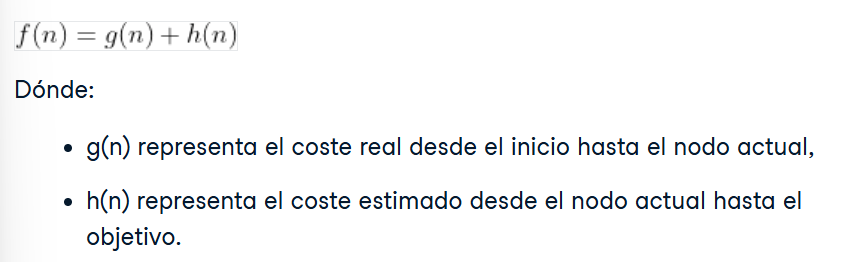

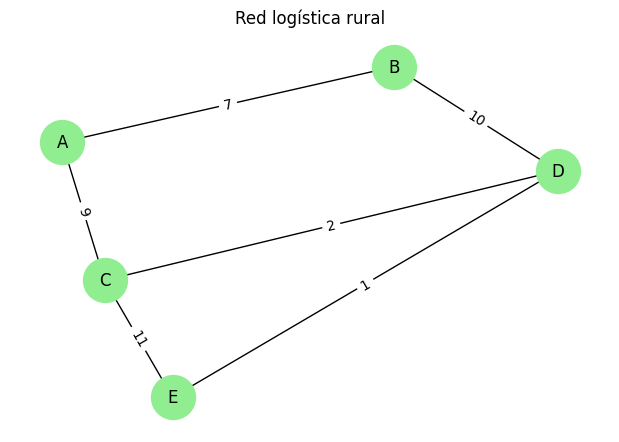

In [6]:
#Ejemplo profesor
# Grafo de ejemplo para logística
G1 = nx.Graph()
edges1 = [('A', 'B', 7), ('A', 'C', 9), ('B', 'D', 10), ('C', 'D', 2), ('C', 'E', 11), ('D', 'E', 1)]
G1.add_weighted_edges_from(edges1)

# Visualización
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G1)
nx.draw(G1, pos, with_labels=True, node_color='lightgreen', node_size=1000)
labels = nx.get_edge_attributes(G1, 'weight')
nx.draw_networkx_edge_labels(G1, pos, edge_labels=labels)
plt.title("Red logística rural")
plt.show()

In [7]:
#De manera general, le pediremos al usuario que ingrese las rutas de su grafo
node_numbers = int(input("Number of nodes: "))
structure = input("Enter edges (e.g. [('B', 'D', 10)]), separated by commas")

In [9]:
print(structure)

[('A', 'B', 7), ('A', 'C', 9), ('B', 'D', 10), ('C', 'D', 2), ('C', 'E', 11), ('D', 'E', 1)]


In [10]:
tuple = ast.literal_eval(structure)
print(tuple)

[('A', 'B', 7), ('A', 'C', 9), ('B', 'D', 10), ('C', 'D', 2), ('C', 'E', 11), ('D', 'E', 1)]


In [24]:
#Asignar coordenadas a los nodos 
positions = {
    'A': (0, 0),
    'B': (2, 1),
    'C': (1, 4),
    'D': (4, 3),
    'E': (5, 6)
}

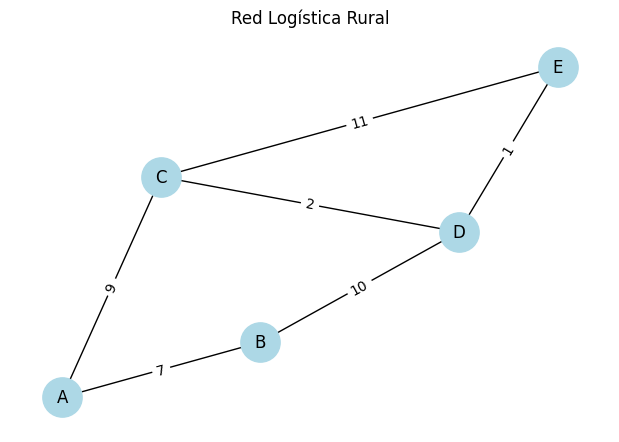

In [31]:
G_general = nx.Graph()
G_general.add_weighted_edges_from(tuple)

# Visualization
plt.figure(figsize=(6, 4))
nx.draw(G_general, pos=positions, with_labels=True, node_size=800, node_color='lightblue')
nx.draw_networkx_edge_labels(G_general, pos=positions, edge_labels=nx.get_edge_attributes(G_general, 'weight'))
plt.title("Red Logística Rural")
plt.show()

La distancia euclideana se estima de la siguiente manera:

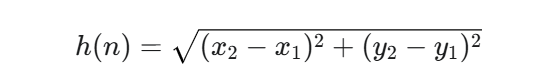

In [ ]:
# 3. Definimos la función de distancia h(n). En este caso la definiremos como la distancia euclidiana entre dos nodos.
def euclidean_heuristic(u, v):
    x1, y1 = positions[u]
    x2, y2 = positions[v]
    return math.hypot(x2 - x1, y2 - y1)

In [33]:
# 4. Run A* using NetworkX
start = 'A'
goal = 'E'
path = nx.astar_path(G_general, start, goal, heuristic=euclidean_heuristic, weight='weight')
cost = nx.astar_path_length(G_general, start, goal, heuristic=euclidean_heuristic, weight='weight')

In [34]:
print("Shortest path:", path)
print("Total cost:", cost)

Shortest path: ['A', 'C', 'D', 'E']
Total cost: 12


En el caso de la inclusión de nuevas rutas, restricciones o cierres viales habría que notificar la estructura del grafo. A continuación se muestran las formas como se modifica la estructura de los grafos según el caso y un ejemplo.

In [ ]:
#Agregar una nueva ruta
G_general.add_edge('A', 'K', weight=15)

Graph with 6 nodes and 7 edges


In [41]:
#Asignar coordenadas a los nodos 
positions = {
    'A': (0, 0),
    'B': (2, 1),
    'C': (1, 4),
    'D': (4, 3),
    'E': (5, 6),
    'K': (3, 0)  # Nueva ubicación para el nodo K
}

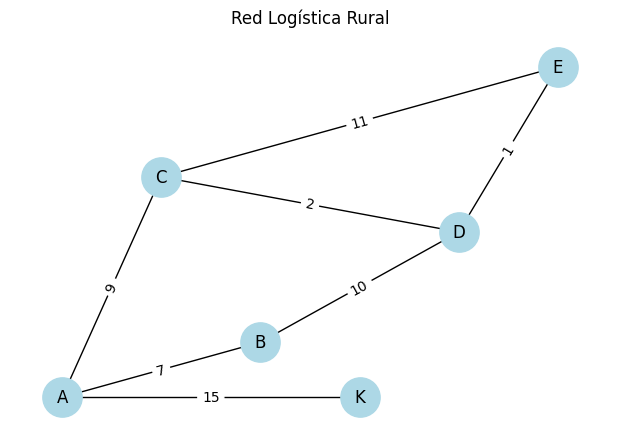

In [42]:
# Visualization
plt.figure(figsize=(6, 4))
nx.draw(G_general, pos=positions, with_labels=True, node_size=800, node_color='lightblue')
nx.draw_networkx_edge_labels(G_general, pos=positions, edge_labels=nx.get_edge_attributes(G_general, 'weight'))
plt.title("Red Logística Rural")
plt.show()

In [44]:
#Eliminar una ruta - Cierre vial
G_general.remove_edge('B', 'D')

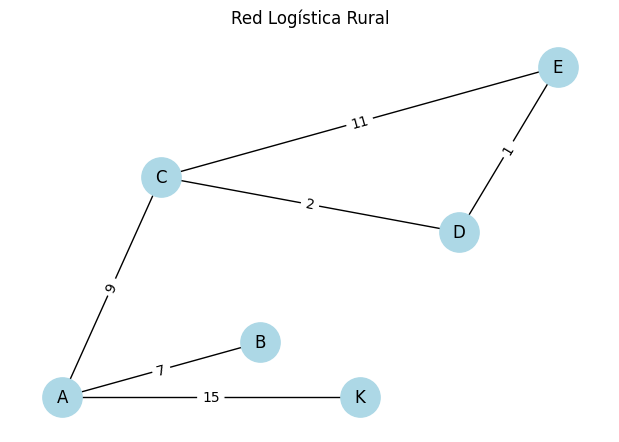

In [45]:
# Visualization
plt.figure(figsize=(6, 4))
nx.draw(G_general, pos=positions, with_labels=True, node_size=800, node_color='lightblue')
nx.draw_networkx_edge_labels(G_general, pos=positions, edge_labels=nx.get_edge_attributes(G_general, 'weight'))
plt.title("Red Logística Rural")
plt.show()

In [46]:
#Cambiar el peso (tráfico lento)
G_general['A']['C']['weight'] = 2

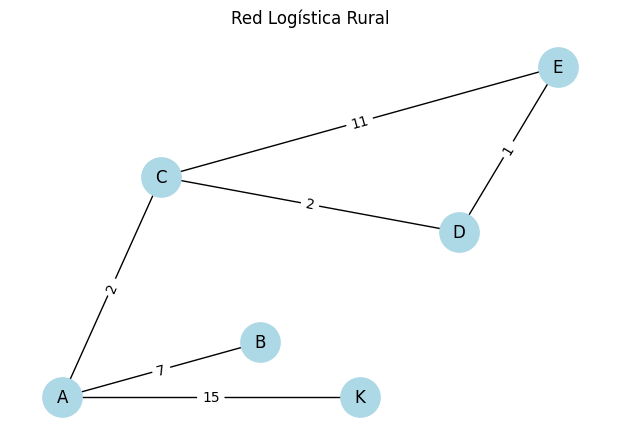

In [47]:
# Visualization
plt.figure(figsize=(6, 4))
nx.draw(G_general, pos=positions, with_labels=True, node_size=800, node_color='lightblue')
nx.draw_networkx_edge_labels(G_general, pos=positions, edge_labels=nx.get_edge_attributes(G_general, 'weight'))
plt.title("Red Logística Rural")
plt.show()

En conclusión, el algoritmo es fácilmente adaptable ante cualquier cambio de ruta, una restricción en el tráfico o cualquier tipo de estos choques.